# Project Overview 

This research project aims at providing insightful data-driven approaches to support the Airtransport industry in expanding to new industries to diversify their portfolio. The project will help the company in determing the most efficient aircraft for either private and commercial enterprises. This project will use data cleaning techniques, imputation, analysis and visualization to generate insights for a business stakeholder. I analyzed the Aviation Dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
The analysis suggest that in the Aviation industry, there has been a decreasing trend in the number of accidents as more aircrafts are designed. This indicates that the Aviation industry is an effective focus and it
is worth investing as accidents are expected to reduce in the future thus the sustainability of the industry.

# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

The businesse's main issues include
1. Uncertainity on the future of the Aviation industry and whether it is a good venture
2. Identify the Low-risk Aircraft for business to purchase 
3. Understanding the risk factors to consider in the aviation industry

The following data questions will be used for the analysis
1. Is it safe to invest in Aviation Industry?
2. What sector should the company invest in between commercial and personalized flights?
3. What make should the company invest in compared to the number of accidents?
4. Which type of aircraft should the company invest in(amatuer built)?
5. Which is the best weather condition for airlines to pass through?
6.  Which is the best engine-type to consider with reduced fatalities and accidents?


# Data Understanding
The research project used data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.This dataset contains summaries of aviation accidents and incidents spanning multiple decades, providing detailed information on various aspects of civil aviation accidents.

The dataset contains two files:

Dataset: AviationData.csv
Description: This is the main dataset that contains detailed records of aviation accidents and incidents. Each row represents a unique aviation event with attributes such as the aircraft type, accident date, location, severity, weather conditions, and details of injuries or fatalities
Relationship to data analysis:This file provides the data necessary for analyzing various risk factors such as aircraft type, flight conditions, and injury outcomes.


Dataset 2: AviationAccidentNarratives.csv
Description: This file contains textual summaries or narratives of aviation accidents and incidents. These narratives are written descriptions of the events, typically including information about what led to the accident, the conditions at the time, and any relevant findings from investigations.


Description of relevant columns

1. Event Id: A unique identifier for each aviation accident or incident
2. Event Date:The date on which the accident or incident occurred.
3. Location:The city or general area where the accident or incident took place.
4. Country: The country where the accident or incident occurred.
5. Injury Severity: Describes the severity of injuries sustained in the event.
6. Aircraft Damage: Indicates the extent of the damage sustained by the aircraft.
7. Make: The manufacturer or company that produced the aircraft.
8. Model: The specific model of the aircraft involved in the event.
9. Amateur Built: Indicates whether the aircraft was built by an amateur or a certified manufacturer.
10. Number of Engines: The number of engines on the aircraft.
11. Engine Type: The type of engine used by the aircraft.
12. Purpose of Flight: Describes the intended mission of the flight.
13. Total Fatal Injuries: The total number of fatal injuries resulting from the accident or incident.
14. Total Serious Injuries: The total number of serious but non-fatal injuries resulting from the accident.
15. Total Minor Injuries: The total number of minor injuries resulting from the event.
16. Total Uninjured: The total number of people on board the aircraft who were uninjured.
17. Weather Condition: The weather conditions at the time of the accident or incident.









#  Data Preparation

Summary of Key Steps:

Missing Data Handling: Imputation for categorical and numerical fields, with a focus on critical fields like Injury Severity and Aircraft Damage.

Transformation: Date parsing, encoding of categorical data, creation of new composite risk features.

Data Validation: Consistency checks and removal of erroneous data.

Aggregation: Summarizing data by aircraft model, time, and location.

Visualization Preparation: Aggregating data and transforming features for effective exploratory data analysis and visualization.

# importing libraries 
The python environment is made up of different libraries meant for different tasks. Therefore, we will only work with the most important python libraries required for data analysis. In this project, we will focus on data cleaning with pandas, data visualization with matplotloib and seaborn and the numpy library for numerical calculations. We will import the libraries with the alias (as) extension to ensure an easier time when coding. Remember that python has specific alias names for each library. The python environment will provide an easier time when working with the data cleaning and data visualization strategies.

In [1]:
import pandas as pd #loads the pandas library from the python environment. The pandas library is necessary for carrying out python data analysis and data cleaning to ensure clean and simplified data for analysis 
import numpy as np #loads the numpy library which is useful for performing numerical operations such as culculating the mean, median and average of numeric data
import matplotlib.pyplot as plt # loads the matplotlib.pyplot library which is an effective data visualization tool for creating graphs and charts 
import seaborn as sns # loads the seaborn library for visualization. The seaborn library will offer an efficient visualization mechanism when the matplotlib does not work as expected
import warnings # the warnings library allows in managing python environment warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# loading the dataset
After importing the necessary libraries required for data cleaning and data visualization, we proceed to loading our data for preparation and understanding. The pandas python library allows reading of data from an external file such as excel files, json files and csv files. Reading files requires encoding mechanisms to ensure that the encoder uses the appropriate mechanism where possible. The user specifies the encoding mechanism depending on the data type available. During the loading process, there are major things to consider such as the encoding style, the memory and whether the data should be printed including the indexes. After loading the data, ensure to print the first five rows and the last five rows to get a glimpse of what data you are handling. 

In [2]:
df= pd.read_csv('AviationData.csv', encoding='iso-8859-1', low_memory=False)#In this project we will use a csv file. Therefore we convert the csv file into a pandas dataframe object with the read_csv function.
df.head()#the df.head() function inspects the first five rows by default to inspect and familiarize with the contents of the dataframe

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The pandas library provides built in functions to identify the number of rows and columns in the dataframe. The df.shape() function provides a tuple (rows, columns) containing the shape of the dataframe


In [3]:
df.shape

(88889, 31)

It is important to check the nature of the inromation in teh dataframe inclusing the column name, the non-null values and count as well as the column data type. This allows in easier analysis of the data frame during data preparation and cleqaning. checking the description of the columns and data types uses the df.info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

checking available columns by their names



In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#Before we proceed with the project requirements, we should familiarize with the statistical columns and the statistical measures such as the mean, the standard deviation and the quartiles 
df.describe() # The df.describe() function outputs the statistical measures of the numerical categories

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We have familiarized with our dataframe which is the first step in data understanding. Now  we can identify the missing values as the first approach to data preparation and data cleaning. Before, we start the dataset analysis, we check the number of missing values so as to establish the most effective ways to handle the missing values.

In [7]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

#  PART ONE : Data Preparation and data cleaning and filtering for analysis


# Step One : Correcting and normalizing the column names

In [8]:
#First, we will use a string function to remove unnecessary characters in the column names. This will ensure that the manager is familiar with the column under investigation during the analysis and visualization. 
# The python .replace function will help in achieving this objective
df.columns = df.columns.str.replace('.', " ", regex=False).str.strip().str.title()# this code replaces the "." in the column names with a space to ensure redability of the column names
df.columns# confirm that the column names have chnaged

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

In [9]:
#When you closely look at the Location column values, You will notice that the values are not standardized into a formal format for writing strings. Therefore, we are required to ensure that the string is formally written.The following code will help us in achieving this.
#For this clean up, we will use the .str.title() function
df["Location"] = df["Location"].str.title()# the .str.title() is a string function which allows string characters to be converted to title case that is(Ensures that the first character of the string is capitalized)
df

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"Moose Creek, Id",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, Va",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"Eureka, Ca",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, Oh",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, Md",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, Nh",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, Az",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, Ut",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Step Two : Determing the relevant columns useful for the analysis based on our business objects.

In [10]:
#We realize that the dataframe has 31 columns which might not all be necessary for business analysis. Therefore, it is important to only select the appropriate and relevant columns for this analysis. 
#According to the business requirements, the relevant columns to access aircraft risk 
columns = ['Event Id', 'Event Date',
       'Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model','Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition']
df_relevant= df[columns]
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, Id",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, Ca",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, Va",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"Eureka, Ca",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, Oh",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [11]:
# Convert the 'Event Date' column to datetime format
# We use pd.to_datetime() to ensure the column is in the correct format for date operations.
df_relevant['Event Date'] = pd.to_datetime(df_relevant['Event Date'], errors='coerce')

# Display the updated DataFrame to verify the conversion
df_relevant



,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, Id",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, Ca",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, Va",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"Eureka, Ca",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, Oh",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, Md",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,2022-12-26,"Hampton, Nh",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,2022-12-26,"Payson, Az",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,2022-12-26,"Morgan, Ut",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [12]:
df_relevant = df_relevant.replace(["UNK", "Unk"], "Unknown")
df_relevant.sample(10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
58373,20050404X00405,2005-03-27,"Long Beach, Ca",United States,Non-Fatal,Substantial,Piper,PA-32-301T,No,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC
15867,20001213X34831,1986-09-12,"Miami, Fl",United States,Non-Fatal,Substantial,Piper,PA-34-200,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
80881,20171119X14748,2017-11-19,"San Jose, Ca",United States,Non-Fatal,Substantial,CESSNA,172P,No,1.0,Reciprocating,Personal,0.0,1.0,2.0,0.0,VMC
79811,20170427X94347,2017-04-27,"Keene, Ca",United States,Fatal,Destroyed,NANCHANG,CJ6A,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC
68479,20100712X15100,2010-07-10,"Sedona, Az",United States,Non-Fatal,Substantial,PIPER,PA32RT,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC
11989,20001214X36888,1985-06-19,"Waitsfield, Vt",United States,Fatal(1),Destroyed,Schempp-hirth,VENTUS-B,No,NaN,Unknown,Personal,1.0,0.0,0.0,0.0,VMC
78410,20160614X83429,2016-06-13,"Ajo, Az",United States,Non-Fatal,Substantial,EUROCOPTER,EC120,No,1.0,Turbo Shaft,Public Aircraft - Federal,0.0,0.0,0.0,1.0,VMC
29085,20001212X18046,1991-09-14,"Liberal, Ks",United States,Non-Fatal,Substantial,Hispano Aviacion,HA200,No,2.0,Turbo Jet,Other Work Use,0.0,0.0,0.0,1.0,VMC
59239,20050818X01279,2005-08-04,"Kellogg, Id",United States,Non-Fatal,Substantial,Cessna,150L,No,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC
12787,20001214X37561,1985-08-26,"Ft. Lauderdale, Fl",United States,Incident,Minor,Aeronca,7AC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC


In [13]:
# Extract the year from the 'Event Date' column
# We use string slicing to get the first four characters representing the year.
df_relevant['Year'] = df_relevant['Event Date'].astype(str).str[:4]
# Display the updated DataFrame to verify the new 'Year' column has been added
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45444,1948-10-24,"Moose Creek, Id",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,1948
1,20001218X45447,1962-07-19,"Bridgeport, Ca",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,1962
2,20061025X01555,1974-08-30,"Saltville, Va",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, Ca",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
4,20041105X01764,1979-08-02,"Canton, Oh",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,2022-12-26,"Annapolis, Md",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,2022
88885,20221227106494,2022-12-26,"Hampton, Nh",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2022
88886,20221227106497,2022-12-26,"Payson, Az",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,2022
88887,20221227106498,2022-12-26,"Morgan, Ut",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,2022


In [14]:
# Count occurrences of each year
year_counts = df_relevant['Year'].value_counts()

# Identify years with counts greater than 1
years_to_keep = year_counts[year_counts > 1].index

# Filter the DataFrame to keep only those years
df_relevant = df_relevant[df_relevant['Year'].isin(years_to_keep)]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
51673,20011030X02165,2001-10-24,"Brunswick, Ga",United States,Non-Fatal,Substantial,Piper,PA-28-181,No,1.0,Reciprocating,Personal,NaN,NaN,2.0,NaN,IMC,2001
72135,20120710X90413,2012-07-09,"London England, United Kingdom",United Kingdom,NaN,NaN,BOEING,747,No,4.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2012
79286,20161201X23648,2016-11-23,"Pensacola, Fl",United States,Non-Fatal,Substantial,AMERICAN LEGEND AIRCRAFT CO,AL3,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,2016
66012,20090302X94306,2009-03-02,"San Antonio, Tx",United States,Non-Fatal,Substantial,MARRERO ANDRES,STARDUSTER,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2009
43251,20001211X09460,1998-01-03,"Compton, Ca",United States,Non-Fatal,Substantial,Cessna,210,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,1998
29504,20001212X18410,1991-11-25,"Carrollton, Ga",United States,Non-Fatal,Substantial,Cessna,210H,No,1.0,Reciprocating,Business,0.0,0.0,1.0,0.0,VMC,1991
4793,20001214X43158,1983-05-26,"Ephrata, Wa",United States,Non-Fatal,Substantial,I.c.a. Brasov,IS-29D,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,1983
20115,20001213X25369,1988-04-18,"Cantwell, Ak",United States,Non-Fatal,Substantial,Cessna,206,No,1.0,Reciprocating,Unknown,0.0,0.0,0.0,3.0,VMC,1988
21426,20001213X26893,1988-09-10,"Warrensburg, Mo",United States,Non-Fatal,Substantial,Cessna,172,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,1988
644,20020917X02489,1982-03-21,"Haverhill, Ma",United States,Non-Fatal,Substantial,Cessna,172M,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982


# Step 3: Handling missing values. 
While handling missing values, we can either drop the missing values or replace them with either the mean, median or mode. Note that the mean, median and mode are applicable to numerical values. Dropping the missing values is effective when the missing values make only a small percentage of the entire column and therefore might not cause significant changes to the data analysis.

In [15]:
#lets prepare the relevant data.  First let's identify the number of missing values in the relevant columns required for analysis.This will allow in solving the missing values.
df_relevant.isna().sum()

Event Id                      0
Event Date                    0
Location                     52
Country                     226
Injury Severity            1000
Aircraft Damage            3194
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7077
Purpose Of Flight          6192
Total Fatal Injuries      11401
Total Serious Injuries    12509
Total Minor Injuries      11932
Total Uninjured            5911
Weather Condition          4492
Year                          0
dtype: int64

In [16]:
#First we create a list of the columns we want to drop the null values. After creating the list, we drop the null values because the percentage will not cause a significant impact on the analysis 
drop_columns = ['Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight',
       'Weather Condition']
df_relevant = df_relevant.dropna(subset = drop_columns) #The dropna() function deletes the null values in the df_relevant dataframe
df_relevant.isnull().sum() #We confirm that the columns have been dropped and print the sum of the missing values not dropped.

Event Id                      0
Event Date                    0
Location                      0
Country                       0
Injury Severity               0
Aircraft Damage               0
Make                          0
Model                         0
Amateur Built                 0
Number Of Engines             0
Engine Type                   0
Purpose Of Flight             0
Total Fatal Injuries       9386
Total Serious Injuries    10247
Total Minor Injuries       9524
Total Uninjured            4691
Weather Condition             0
Year                          0
dtype: int64

In [17]:
#fill the remaining null values with 0. We assume that the null rows mean that there were no fatals and injuries
replace_columns = ['Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

df_relevant = df_relevant.fillna(0)
df_relevant.isnull().sum()

Event Id                  0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Number Of Engines         0
Engine Type               0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
Year                      0
dtype: int64

In [18]:
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, Wa",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, Nj",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, Fl",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, Nm",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, Al",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, Tx",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, Ga",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, Ok",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, Tx",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


Now that we have solved the missing values issues in our dataframe, we should prepare the data for analysis.

In [19]:
## Acording to the business requirements, we should include data from the year 1962 for analysis. When we look at the Year column, we notice that our dataframe contains years before 1948 and we should drop them
df_relevant['Year'] = pd.to_numeric(df_relevant['Year'], errors='coerce')
df_relevant = df_relevant[df_relevant['Year'] >= 1962]
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, Wa",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, Nj",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, Fl",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, Nm",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, Al",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, Tx",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, Ga",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, Ok",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, Tx",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


In [20]:
#Also, the Make and the Purpose of Flight column contains a mixture of uppercase and lowercase letters. As a professional goal, we should ensure that the daaframe is presentable and easy to read. Therefore, it is good to ensure consistency formatting in the values of the dataframe.
df_relevant["Make"] = df["Make"].str.title()
df_relevant["Purpose Of Flight"] = df_relevant["Purpose Of Flight"].str.title()
df_relevant

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, Wa",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, Nj",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, Fl",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, Nm",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, Al",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, Tx",United States,Non-Fatal,Substantial,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, Ga",United States,Non-Fatal,Substantial,Cessna,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, Ok",United States,Non-Fatal,Substantial,Beech,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, Tx",United States,Minor,Substantial,Stephen J Hoffman,MS-500,Yes,1.0,Reciprocating,Asho,0.0,1.0,0.0,0.0,VMC,2022


In [21]:
# Remove leading and trailing whitespaces from all string columns in the DataFrame
df_relevant = df_relevant.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check the updated DataFrame
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, Wa",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, Nj",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, Fl",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, Nm",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, Al",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982


# PART TWO: Writting to csv file for data analysis

In [22]:
df_relevant.to_csv('Cleaned_AviationData.csv', index=False)

# PART THREE: Data Analysis 

Now that we have a cleaned dataframe, we should start the data analysis and data visualization. This will help us to drive clear and informative insights for the business. We will focus on specific questions to address specific recommendations for the aircraft

In [23]:
# loading the cleaned dataframe for analysis
df_cleaned = pd.read_csv("Cleaned_AviationData.csv")
df_cleaned


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20020909X01562,1982-01-01,"Pullman, Wa",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
1,20020909X01561,1982-01-01,"East Hanover, Nj",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
2,20020909X01560,1982-01-01,"Jacksonville, Fl",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
3,20020909X01559,1982-01-01,"Hobbs, Nm",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
4,20020909X01558,1982-01-01,"Tuskegee, Al",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75338,20221011106092,2022-10-06,"Iola, Tx",United States,Non-Fatal,Substantial,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75339,20221011106098,2022-10-08,"Dacula, Ga",United States,Non-Fatal,Substantial,Cessna,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
75340,20221018106153,2022-10-13,"Ardmore, Ok",United States,Non-Fatal,Substantial,Beech,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75341,20221031106231,2022-10-29,"Houston, Tx",United States,Minor,Substantial,Stephen J Hoffman,MS-500,Yes,1.0,Reciprocating,Asho,0.0,1.0,0.0,0.0,VMC,2022


In [24]:
#check the number of columns to determine the columns for analysis 
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75343 entries, 0 to 75342
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                75343 non-null  object 
 1   Event Date              75343 non-null  object 
 2   Location                75343 non-null  object 
 3   Country                 75343 non-null  object 
 4   Injury Severity         75343 non-null  object 
 5   Aircraft Damage         75343 non-null  object 
 6   Make                    75343 non-null  object 
 7   Model                   75343 non-null  object 
 8   Amateur Built           75343 non-null  object 
 9   Number Of Engines       75343 non-null  float64
 10  Engine Type             75343 non-null  object 
 11  Purpose Of Flight       75343 non-null  object 
 12  Total Fatal Injuries    75343 non-null  float64
 13  Total Serious Injuries  75343 non-null  float64
 14  Total Minor Injuries    75343 non-null

In [25]:
#check the statistical values
df_cleaned.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year
count,75343.000000,75343.000000,75343.000000,75343.000000,75343.000000,75343.000000
mean,1.116507,0.390959,0.203310,0.281632,2.182446,1997.383937
std,0.379999,2.811601,0.748067,1.213083,14.786260,11.140562
min,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1996.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2006.000000
max,8.000000,270.000000,81.000000,125.000000,699.000000,2022.000000


After examining the data, we can answer some questions to help the Aircraft company in determining whether the venture to aircraft is effective 

Question 1: Is it safe to invest in Aviation Industry?

The aviation industry is an old transport industry that has drastically changed over the years. To know if the industry is a good investment for the company, it is important to analyze how safer the industry is across time. This will be done by showing the number of accidents per year.

In [26]:
#calculate the number of accidents per year
number_of_accidents_per_year = df_cleaned['Year'].value_counts().tolist()
years = df_cleaned['Year'].value_counts().index.tolist()

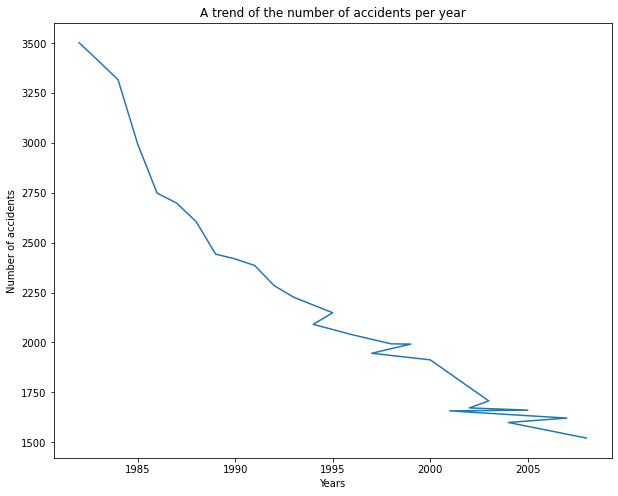

In [27]:
#visualization of the number of accidents per the year to determine the trend of accidents over the years
#plot a line graph that shows the trend of accidents overtime
#I included the years from 1982 moving forward as before there were not many flights
x = years[:26]
y = number_of_accidents_per_year[:26]
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('A trend of the number of accidents per year');

Recommendation: In the Aviation industry, there has been a decreasing trend in the number of accidents as more aircrafts are designed. This indicates that the Aviation industry is an effective focus and it is worth investing as accidents are expected to reduce in the future thus the sustainability of the industry


Question 2: What sector should the company invest in between commercial and personalized flights?

Purpose of the flight vs the number of accidents. This analysis and visualization will help the aircraft company in determining the best purpose between the personal flights and commercial flights to engage in considering the number of accidents by purpose.

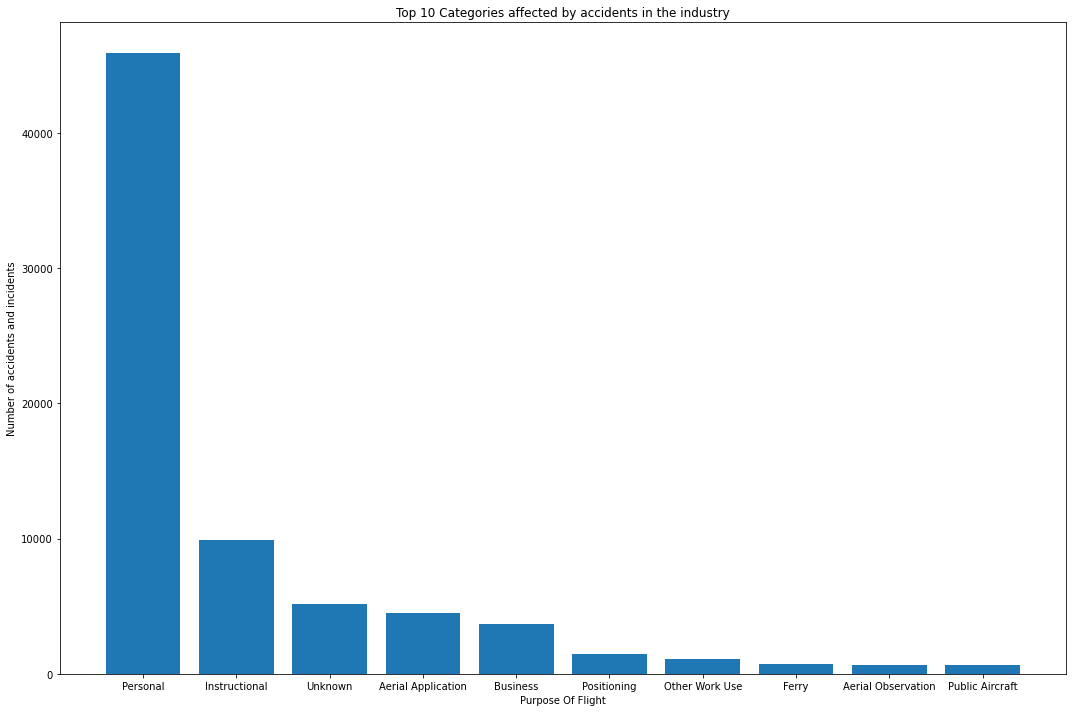

In [28]:
#The visualization illustrates the most affected categories by accidents

Purpose = df_cleaned['Purpose Of Flight'].value_counts()
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(Purpose.index.tolist()[:10],Purpose.tolist()[:10])
ax.set_xlabel('Purpose Of Flight')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 Categories affected by accidents in the industry');

Recommendation: The aircraft should invest in public Aircraft because it has recorded the least number of accidents and incidents thus has a low accident risk compared to the other purposes.

# Comparison between the Make of Aircraft and number of accidents
Question3: What make should the company invest in compared to the number of accidents?

In [29]:
Counts_of_accidents_incidents = df_cleaned['Make'].value_counts()
Make_of_Aircraft = Counts_of_accidents_incidents.index

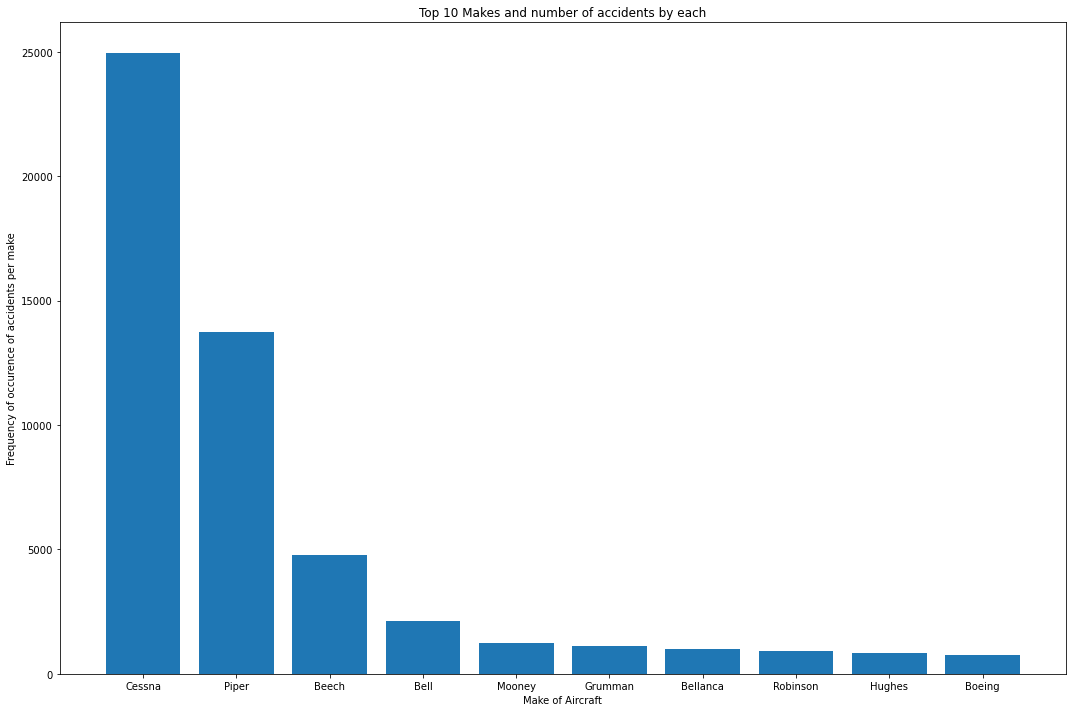

In [30]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(Make_of_Aircraft[:10],Counts_of_accidents_incidents[:10])
ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('Frequency of occurence of accidents per make')
ax.set_title('Top 10 Makes and number of accidents by each');

Recommendation: While the visualization offers the leading companies in the number of accidents, the information might be limited to time contsraints. The above visualization limits the company from investing in the above makes since they have a trend of causing accidents. However, the recommendation is not reliable with the current industry. The company should invest in the Boeing Make as they convey reduced accident cases thus improved functionality

# type of aircraft to invest in

Question 4: Which type of aircraft whould the company invest in(amatuer built)?


It is important to consider the amatuer built when considering the requirements of the airline and how they affect the functionality of the airline. In this case, we consider how airlines with amatuer builts cause accidents through the seriousness of the injuries they cause compared to those without amatuers

In [31]:
# Exclude 'Unavailable' entries
df_cleaned = df_cleaned.loc[~(df_cleaned['Injury Severity'] == 'Unavailable')]

# Strip 'Fatal', replace 'Non-' and 'Inciden' with '0'
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.strip('Fatal')
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.replace('Non-', '0')
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.replace('Inciden', '0')

# Map non-numeric categories to numbers
severity_mapping = {
    'Minor': 1,
    'Moderate': 2,
    'Serious': 3
}

df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].replace(severity_mapping)

# Strip parentheses
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].str.strip('(').str.strip(')')

# Replace empty strings with NaN
df_cleaned['Injury Severity'].replace('', np.nan, inplace=True)

# Drop rows with NaN values in 'Injury Severity'
df_cleaned.dropna(subset=['Injury Severity'], inplace=True)

# Convert to integer
df_cleaned['Injury Severity'] = df_cleaned['Injury Severity'].astype(int)



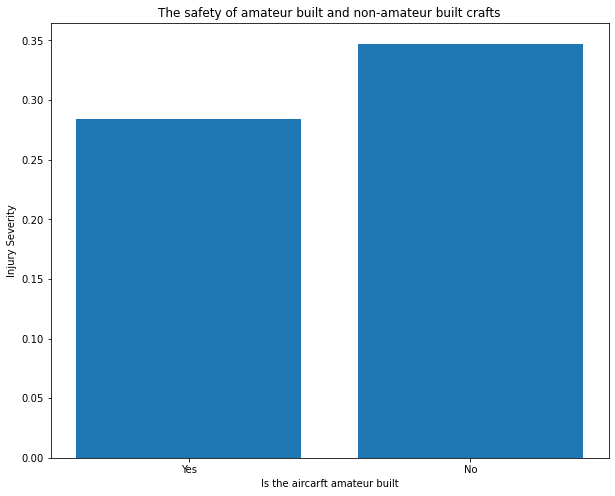

In [32]:
safety = df_cleaned.groupby(['Amateur Built'])['Injury Severity'].mean().sort_values()
x = safety.index.tolist()
y = safety.tolist()
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(x,y)
ax.set_ylabel('Injury Severity')
ax.set_xlabel('Is the aircarft amateur built')
ax.set_title('The safety of amateur built and non-amateur built crafts');


Recommendation: According to the analysis, aicrafts which are not amateur built seem to have a high injury severity compared to those with amatuer built. So the company should focus on airlines which are amaterur built for reduced accidents.

Question 5: Which is the best weather condition for airlines to pass through?

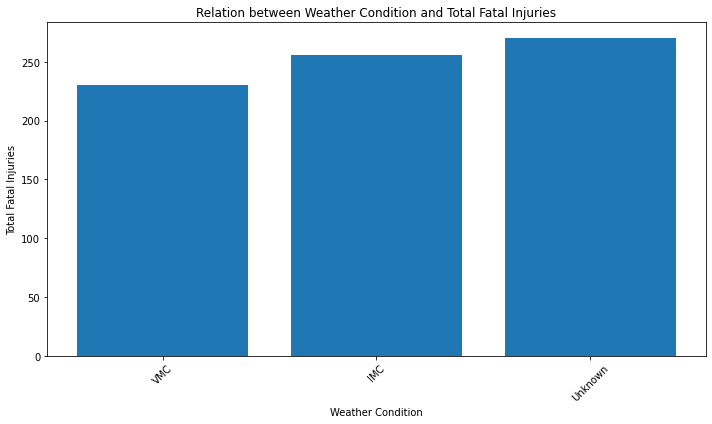

In [33]:
df_cleaned['Weather Condition'] = df_cleaned['Weather Condition'].replace('Unk', 'UNK')
weather_condition = df_cleaned['Weather Condition']  # Column for weather conditions

accidents = df_cleaned['Total Fatal Injuries']       # Column for the number of accidents (total fatal injuries)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar plot
ax.bar(weather_condition, accidents)  # Correctly using the variable names

# Set labels and title

ax.set_xlabel('Weather Condition')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Relation between Weather Condition and Total Fatal Injuries')

# Rotate x-axis labels if weather conditions are categorical and long
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

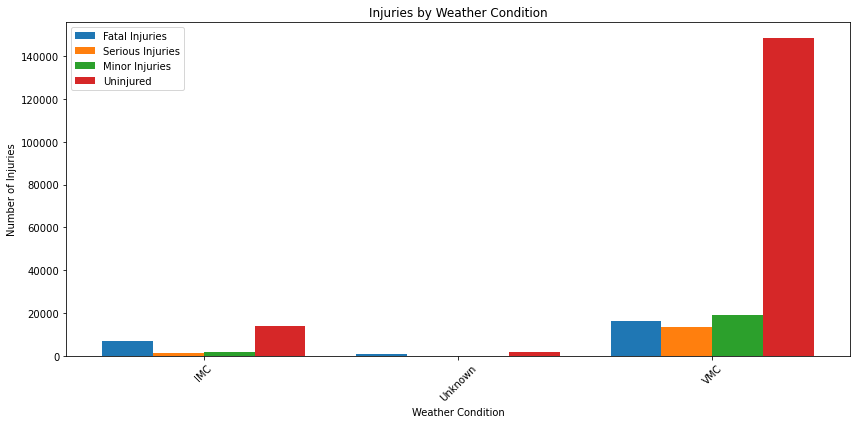

In [34]:
# Grouping data by 'Weather Condition' and summing up injury counts
injuries_by_weather = df_cleaned.groupby('Weather Condition')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Defining the number of bars per weather condition and their positions
bar_width = 0.2
index = np.arange(len(injuries_by_weather))

# Creating subplots for each injury type side by side
plt.figure(figsize=(12, 6))

# Plot each injury type next to each other
plt.bar(index, injuries_by_weather['Total Fatal Injuries'], bar_width, label='Fatal Injuries')
plt.bar(index + bar_width, injuries_by_weather['Total Serious Injuries'], bar_width, label='Serious Injuries')
plt.bar(index + 2 * bar_width, injuries_by_weather['Total Minor Injuries'], bar_width, label='Minor Injuries')
plt.bar(index + 3 * bar_width, injuries_by_weather['Total Uninjured'], bar_width, label='Uninjured')

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Weather Condition')
plt.xticks(index + bar_width * 1.5, injuries_by_weather.index, rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

Recommendation: The VMC indicates the best weather condition with most uninjured cases therefore sustainable for business operation. Pilots are advised to fly with the VMC condition.


Question 6: Which is the best engine-type to consider with reduced fatalities and accidents?


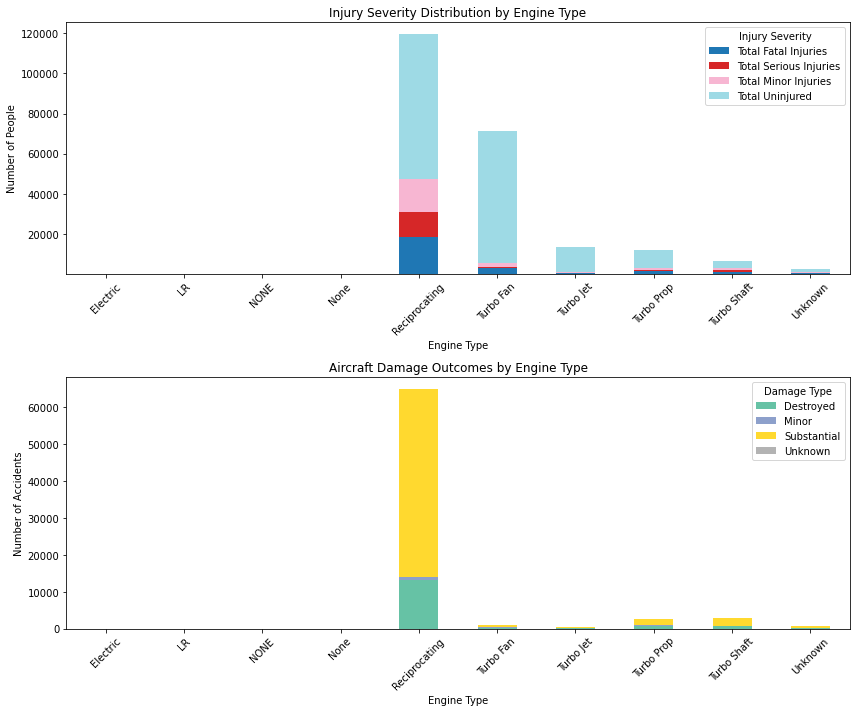

In [35]:
# Grouping data by 'Engine Type' and aggregating injury severities and accident outcomes
engine_type_analysis = df_cleaned.groupby('Engine Type')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Adding counts of damage types per engine type
damage_by_engine_type = df_cleaned.groupby('Engine Type')['Aircraft Damage'].value_counts().unstack().fillna(0)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the
# Plotting the injury severity distribution as a stacked bar plot
engine_type_analysis.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')

# Adding labels and title for the first subplot
ax1.set_title('Injury Severity Distribution by Engine Type')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Number of People')
ax1.legend(title='Injury Severity')
ax1.set_xticklabels(engine_type_analysis.index, rotation=45)
# Plotting the aircraft damage outcomes as a stacked bar plot
damage_by_engine_type.plot(kind='bar', stacked=True, ax=ax2, colormap='Set2')

# Adding labels and title for the second subplot
ax2.set_title('Aircraft Damage Outcomes by Engine Type')
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Number of Accidents')
ax2.legend(title='Damage Type')
ax2.set_xticklabels(damage_by_engine_type.index, rotation=45)
# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



Question 6: What is the survivability rate considering model and make of aircraft?
 
We access the survivability rate to determine the best make and model with reduced accident fatalities

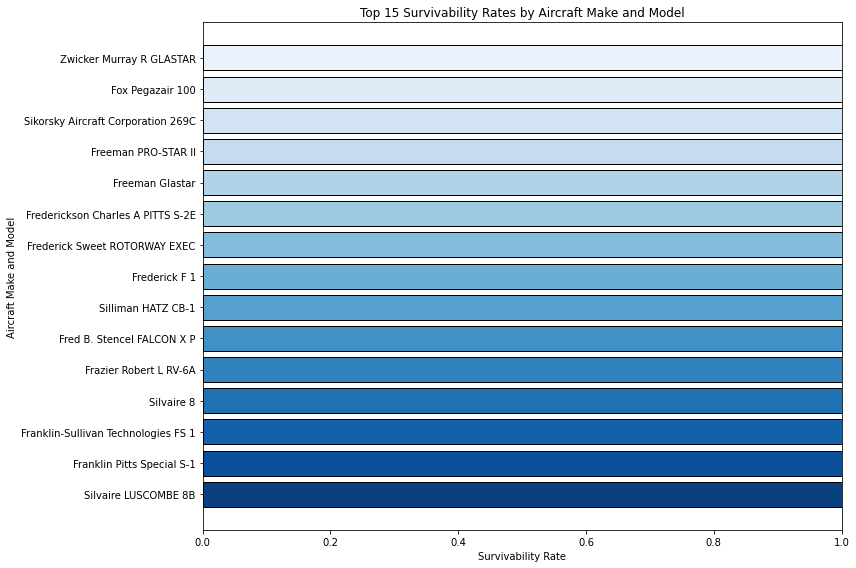

In [36]:
# Step 1: Calculate total passengers involved in each accident
df_cleaned['Total Passengers'] = df_cleaned[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum(axis=1)

# Step 2: Calculate survivability rate as Total Uninjured / Total Passengers
df_cleaned['Survivability Rate'] = df_cleaned['Total Uninjured'] / df_cleaned['Total Passengers'].replace(0, pd.NA)
# Step 3: Group by 'Make' and 'Model' to get average survivability rates for each combination
survivability_by_make_model = df_cleaned.groupby(['Make', 'Model'])['Survivability Rate'].mean().reset_index()

# Step 4: Sort by survivability rate in descending order to find the best-performing makes and models
survivability_by_make_model_sorted = survivability_by_make_model.sort_values(by='Survivability Rate', ascending=False)
# Step 5: Select the top 15 makes and models with the highest survivability rates
top_15_survivability = survivability_by_make_model_sorted.head(15)

# Step 6: Create subplots for visualization
fig, ax = plt.subplots(figsize=(12, 8))
# Step 7: Create a color gradient based on survivability rates
colors = sns.color_palette("Blues", n_colors=len(top_15_survivability))

# Step 8: Bar plot of survivability rates by top 15 aircraft make and model
bars = ax.barh(top_15_survivability['Make'] + ' ' + top_15_survivability['Model'], 
                top_15_survivability['Survivability Rate'], 
                color=colors)
# Optional: Add edge color
for bar in bars:
    bar.set_edgecolor('black')
# Add labels and title
ax.set_xlabel('Survivability Rate')
ax.set_ylabel('Aircraft Make and Model')
ax.set_title('Top 15 Survivability Rates by Aircraft Make and Model')
ax.set_xlim(0, 1)  # Survivability rates range between 0 and 1
ax.invert_yaxis()  # Invert y-axis to have highest survivability on top
# Step 9: Display the plot
plt.tight_layout()
plt.show()